<a href="https://colab.research.google.com/github/ARU-Bioinformatics/advanced-programming-SBV/blob/main/Solving_ODEs_with_SIR_modelling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Practicising solving ODEs with SIR modelling



In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.integrate import odeint

Here we will make a simple SIR simulation.

S = S(t)	is the number of susceptible individuals,
I = I(t)	is the number of infected individuals, and
R = R(t)	is the number of recovered individual

As the first step in the modeling process, we identify the independent and dependent variables. The independent variable is time  t,  measured in days. The dependent variables counts people in each of the groups, each as a function of time:

Recall that:

$dS/dt = -beta*S*I$

$dI/dt = -beta*S*I - gamma*I$

$dR/dt = gamma*I$
 

Here, we call the solution y(t), where y(t) is a vector [S(t),I(t),R(t)].
The solution tells us what is the state of each group at each time point.

In order to run a simulation, we need to define our ordinary differential equations (ODE) by a function.
The input to this function is the state of the three groups in a single time point - y, and compute how they change  - dy

In [ ]:
def SIR(y,t):
        # define the simulation parameters within the function
        b = 0.3  
        g = 1/7 
        
        [S,I,R] = y        
        dy      = np.empty(3)
        
        dy[0] = -b*S*I
        dy[1] =  b*S*I - g*I
        dy[2] =  g*I
        return dy


In order to run the simulation we will use a off-the shelf ODE solver, provided within scipy.integrate package

The first argument that this solver recives is the ODE function that we defined.
The seconde argument is the intial condition. Lets start with [0.99,0.01,0], Hence - 1% is infected, no deaths or recoveries
The third argument is the timeframe of the simulation. 

lets simulate 100 days. In order to do so, I use numpy packge to create a vector of 100 days -  


In [ ]:
n_days = 100
sol    = odeint(SIR,[0.99,0.01,0],np.arange(0,n_days))

Finally, I create a Dataframe of the solution to plot it nice and easly, Dataframe is a good way to store information in python.

Text(0.5, 1.0, 'Simple SIR model')

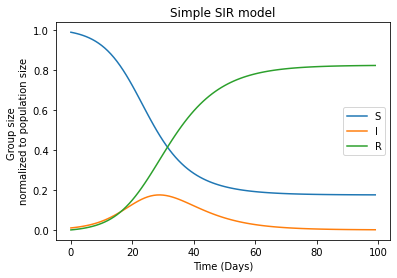

In [ ]:
df = pd.DataFrame(sol,columns=['S','I','R'])
df.plot()
plt.xlabel('Time (Days)')
plt.ylabel('Group size \nnormalized to population size')
plt.title('Simple SIR model')

It is also possible to handle the simulation parameters to the ODE solver.
To do so, add a third input to the ODE function

In [ ]:
def SIR_pars(y,t,b):
        
        g = 1/7
        
        [S,I,R] = y        
        dy      = np.empty(3)
        
        dy[0] = -b*S*I
        dy[1] =  b*S*I - g*I
        dy[2] =  g*I
        return dy


The ODE solver can get extra argument using the following syntax 
The solver excpect that extra arguments will be handled via tuple (using round parentheses and  a comma)
in this case of a single argument use: args = (b,). 

In the case of a more the one extra argument, simply sperate the argument by a comma 
for example: args = (b,g)

In [ ]:

n_days = 100
b   = 0.3
sol = odeint(SIR_pars,[0.99,0.01,0],np.arange(0,n_days),args = (b,))
df  = pd.DataFrame(sol,columns=['S','I','R'])


Lets look only at the infected group 

Text(0.5, 1.0, 'Simple SIR model')

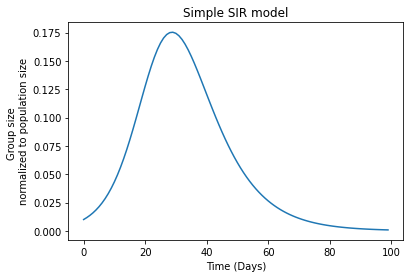

In [ ]:

df.I.plot()
plt.xlabel('Time (Days)')
plt.ylabel('Group size \nnormalized to population size')
plt.title('Simple SIR model')

Lets look how the solution changes as we change the parameter b, we will use a FOR loop: 
I set a range of b values to simulate.

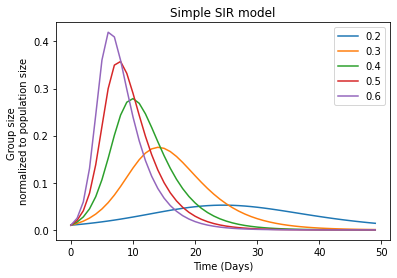

In [ ]:
bs = np.arange(0.2,0.7,0.1)
for b in bs:
    sol = odeint(SIR_pars,[0.99,0.01,0],np.linspace(0,n_days),args = (b,))
    df  = pd.DataFrame(sol,columns=['S','I','R'])
    df.I.plot()

plt.xlabel('Time (Days)')
plt.ylabel('Group size \nnormalized to population size')
plt.title('Simple SIR model')
plt.legend(np.round(bs,decimals=2))

Lowering b is a good approximation for increasing social distancing.
As the probability to have infectious encounter decreases with social distancing
This is the famous flatten the curve strategy